# Spectral Clustering

It makes no assumptions.

Parameter selection:
* n_clusters: number of clusters to be found. The optimal number can be determined analyzing eigenvalues with "eigengap heuristic".
* affinity: How to construct the affinity matrix. Has 4 options:
‘nearest_neighbors’, ‘rbf’, ‘precomputed’, or ‘precomputed_nearest_neighbors’. Their performances can be graphically compared.
* random_state: integer. Using as an integer to make the randomness deterministic.
* assign_labels {‘kmeans’, ‘discretize’}: Using discretization for it to be less sensitive to random initialization.

* The remaining parameters are left by default.

Returns (attributes):
* affinity_matrix: array-like, shape (n_samples, n_samples) Affinity matrix used for clustering. 
* labels_array, shape (n_samples,): Labels of each point

In [1]:
%matplotlib inline
import math
import os
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;
sns.set()
from collections import defaultdict
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
plt.rcParams["figure.figsize"] = (12,7)

C:\Users\lalaj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [38]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
native = VariantCall(path)

In [31]:
list_18 = native.get_subunit_data('RDN18-1')
list_25 = native.get_subunit_data('RDN25-1')

 # Determine n_clusters

*Eigengap heuristic*
* Assumes that the number of clusters k is usually given by the value of k that maximizes the eigengap: the difference between consecutive eigenvalues. 

* Eigenvalues measure the spectrum of an affinity matrix: how "far away" are groups of points similar enough to be in the same cluster.

* The larger this eigengap is, the better spectral clustering works.

Algorithm
* From a ndarray with the coordinates and a given number of neighbors, the affinity matrix is obtained.

* The affinity matrix is normalized and the eigenvalues calculated to find the maximum eigengap.

* The k clusters value and corresponding eigengaps are visualized to determine desirable k

Each point in the graph is a unit

The method for the algorithm is stated in the VariantClass above.


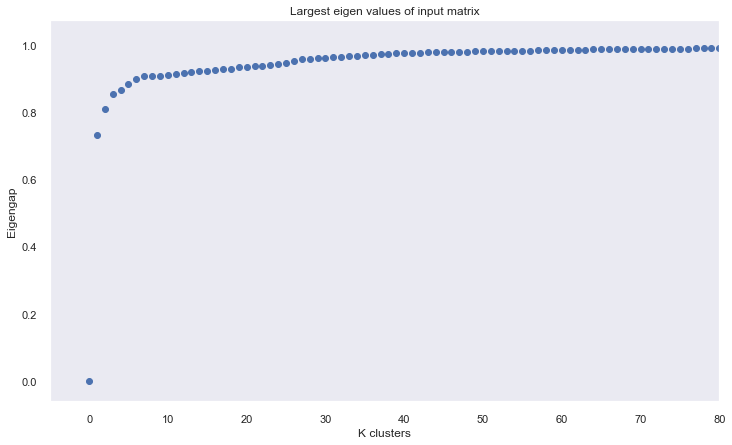

In [104]:
native.spectral_clusters(list_18)

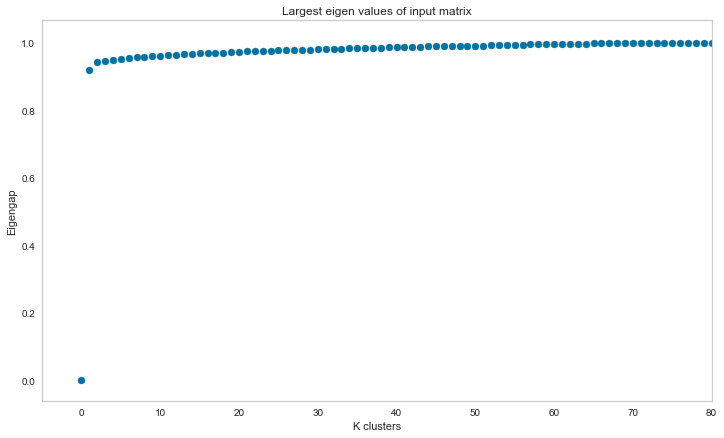

In [39]:
native.spectral_clusters(list_25)  

At k = 8 for 18S and at k = 3 for 25S, the graph reaches a high eigengap value, and after it the increase is not significant (similar to the "elbow" reasoning")

These are the optimal k clusters.

# Determine affinity

*Comparing Silhouette scores*
* The silhouette_score measures how similar each point is to its assigned cluster. The affinity method with highest score is desirable

* Here the affinity matrices built with "nearest_neighbors", "rbf", and the matrix obtained with self tuning are compared.

* Input the chosen k clusters as second argument

The method is stated in the VariantClass

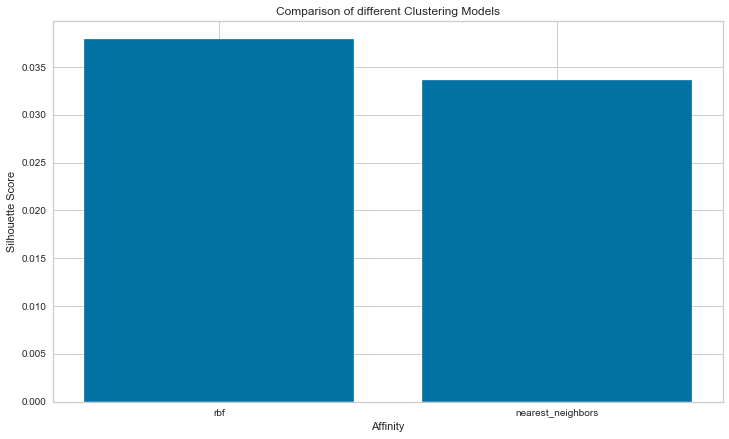

In [40]:
native.spectral_affinity(list_18, 8)

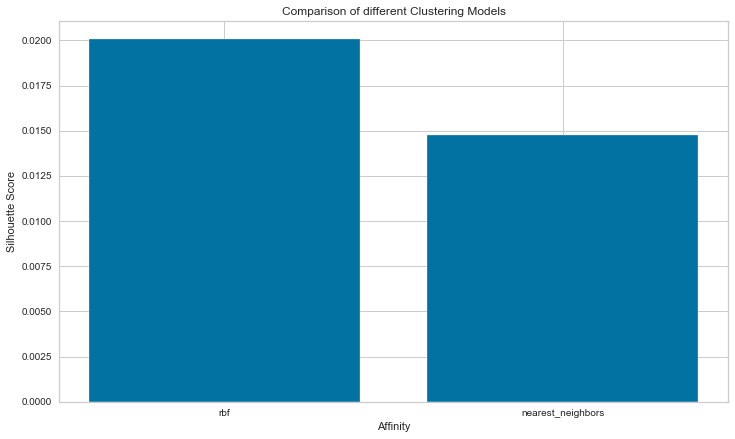

In [41]:
native.spectral_affinity(list_25, 8) 

'rbf' is chosen as it does better than 'nearest_neighbors'.

Plotting the data with the parameters chosen:

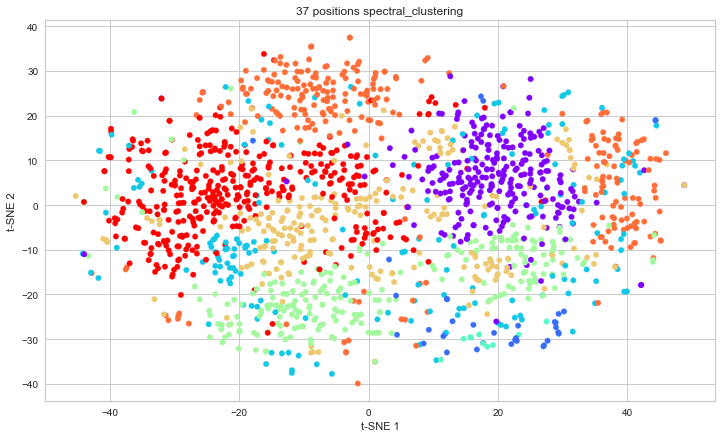

In [42]:
native.plot_tSNE_reads_covering_positions_data(list_18, 'spectral_clustering', n_clusters = 8, affinity = 'rbf') 

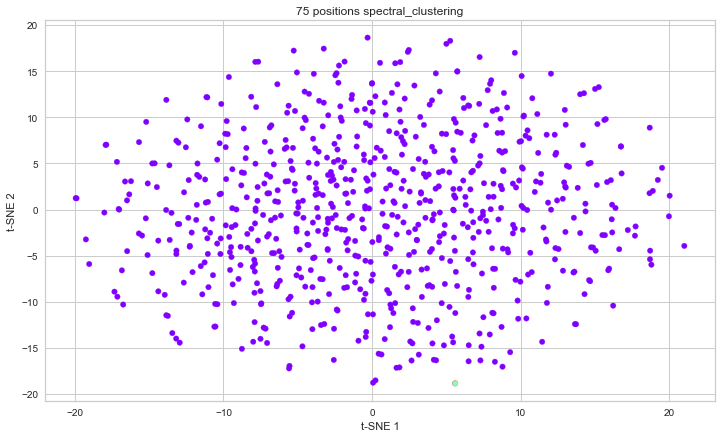

In [43]:
native.plot_tSNE_reads_covering_positions_data(list_25, 'spectral_clustering', n_clusters = 3, affinity = 'rbf') 
#it identifies all as one clusters with other 2 outliers (points of different color below)

https://towardsdatascience.com/spectral-graph-clustering-and-optimal-number-of-clusters-estimation-32704189afbe#:~:text=Spectral%20clustering%20is%20a%20technique,parameter%20for%20the%20similarity%20threshold.